In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# "x * (1 - x)" is the derivative (easier form) of sigmoid function

In [3]:
# "x" is the input
# "y" is the actual output 
# The neural network I took is like - 
#     3 features of input x (Input Layer ,, means 3 neurons in Input Layer), 
#     4 neurons in hidden Layer (Here "weights1" is the weight of Input Layer to Hidden layer edges means 3*4 = 12 edges
#               so (3 x 4) shape
#     1 neuron in the output Layer (Here "weights2" is the weight of Hidden Layer to Output Layer edges means 4*1 = 4 edges
#              so (4 x 1) shape
# "output" is the predicted output after each epoch



# feedforward(self) : The input data self.input is multiplied with self.weights1 using np.dot, and the result is passed 
#                     through the sigmoid activation function to compute the activations of the hidden layer self.layer1.
#                     The hidden layer activations self.layer1 are then multiplied with self.weights2 using np.dot, and 
#                     the result is passed through the sigmoid activation function to compute the output self.output.


# backprop(self) : The error between the predicted output self.output and the target output self.y is calculated using 
#                  2 * (self.y - self.output) * sigmoid_derivative(self.output).
#                  The error is then propagated back to the hidden layer by multiplying it with the transpose of 
#                  self.weights2 and the derivative of the sigmoid function applied to self.layer1.
#                  The gradients for self.weights2 (d_weights2) are computed by multiplying the transpose of self.layer1 
#                  with the output error.
#                  The gradients for self.weights1 (d_weights1) are computed by multiplying the transpose of self.input 
#                  with the hidden layer error.
#                  The weights self.weights1 and self.weights2 are updated by adding their respective gradients.

# train(self, X, y, epochs) : For each epoch, the feedforward and backprop methods are called to perform forward 
#                             propagation and backpropagation, respectively.
#                             Every 100 epochs, the visualize method is called to visualize the neural network.


class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.feedforward()
            self.backprop()
            if epoch % 100 == 0:
                self.visualize(epoch)

    def visualize(self, epoch):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(f"Neural Network - Epoch {epoch}")
    
        # Draw input layer
        for i in range(self.input.shape[1]):
            circle = plt.Circle((-1.5, i), radius=0.2, fill=False)
            ax.add_patch(circle)
            ax.text(-1.7, i, f"x{i+1}", fontsize=8)
    
        # Draw hidden layer
        for i in range(self.weights1.shape[1]):
            circle = plt.Circle((0, i), radius=0.2, fill=False)
            ax.add_patch(circle)
            ax.text(-0.2, i, f"h{i+1}", fontsize=8)
    
        # Draw output layer
        circle = plt.Circle((1.5, 0), radius=0.2, fill=False)
        ax.add_patch(circle)
        ax.text(1.3, 0, "y", fontsize=8)
    
        # Draw weights1 with labels
        for i in range(self.input.shape[1]):
            for j in range(self.weights1.shape[1]):
                ax.arrow(-1.3, i, 1.1, j - i, head_width=0.05, head_length=0.1, fc='k', ec='k')
                ax.text(-0.6, (i + j) / 2, f"{self.weights1[i, j]:.2f}", fontsize=6)
    
        # Draw weights2 with labels
        for i in range(self.weights1.shape[1]):
            ax.arrow(0.2, i, 1.1, -i, head_width=0.05, head_length=0.1, fc='k', ec='k')
            ax.text(0.7, -i / 2, f"{self.weights2[i, 0]:.2f}", fontsize=6)
    
        ax.axis('scaled')
        ax.axis('off')
        plt.tight_layout()
        plt.show(block=False)
        plt.pause(0.001)
        plt.close()

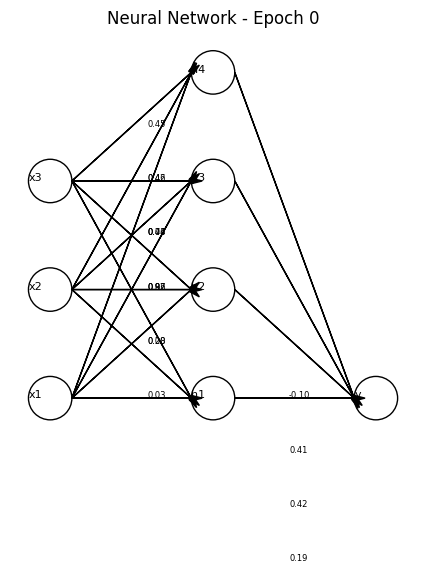

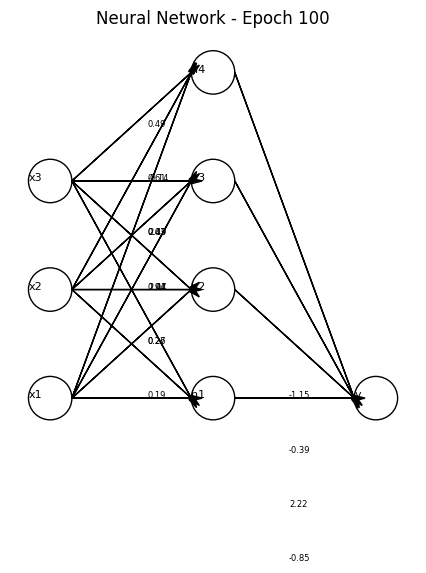

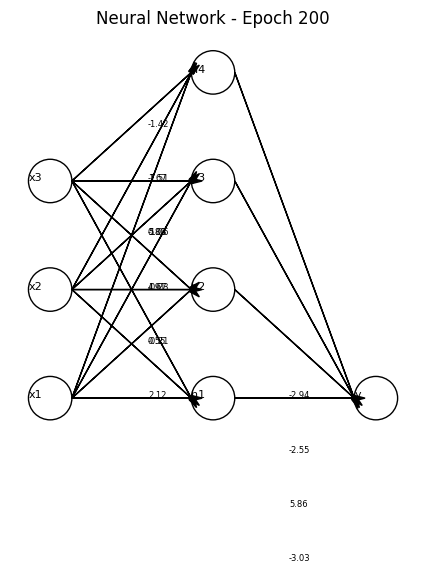

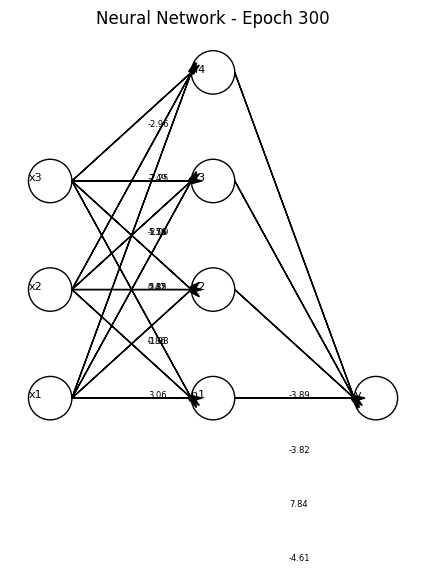

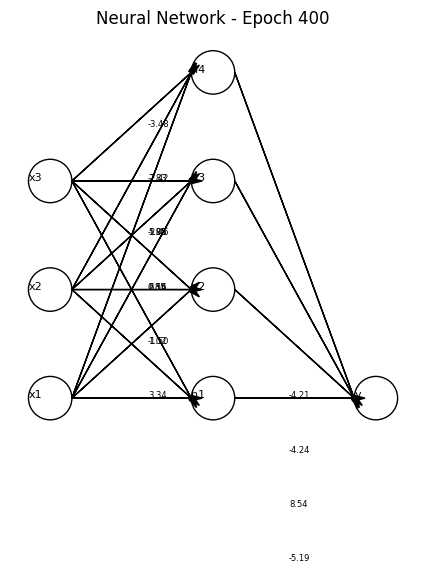

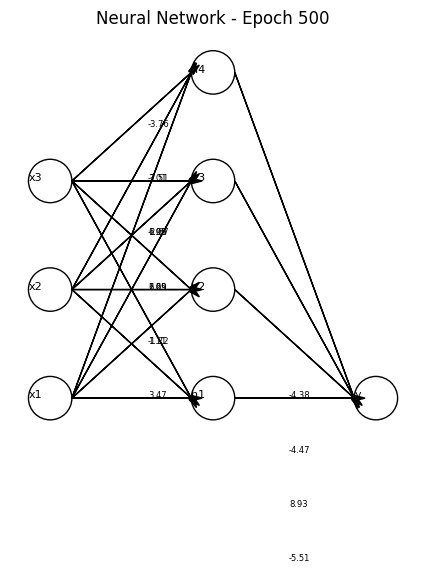

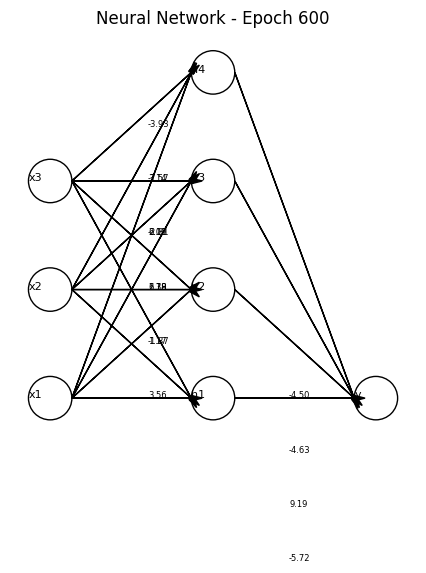

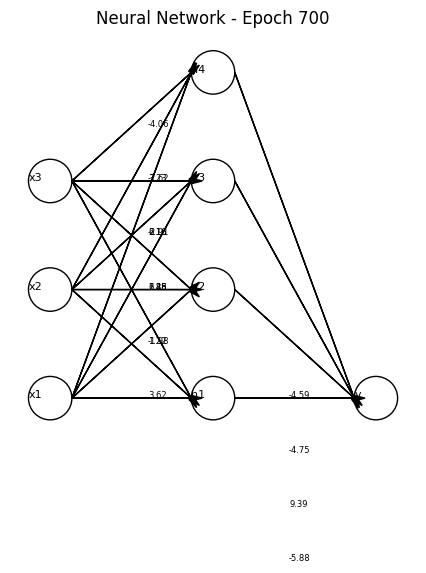

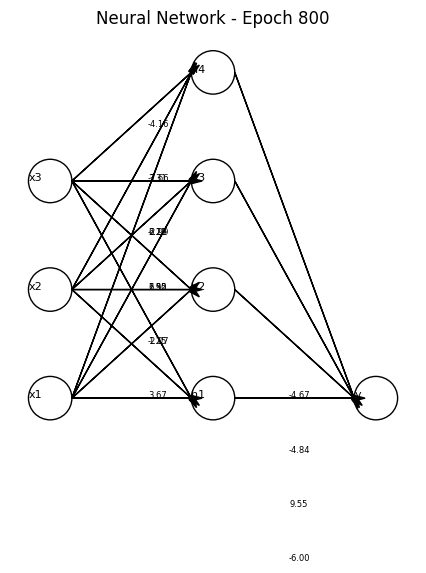

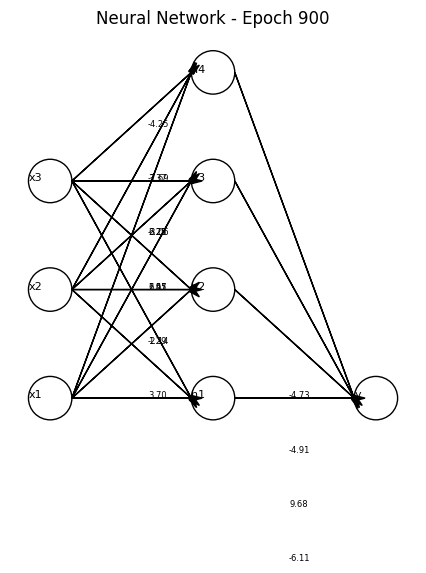

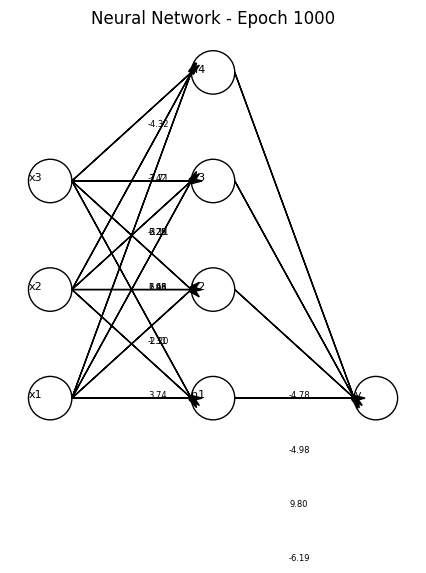

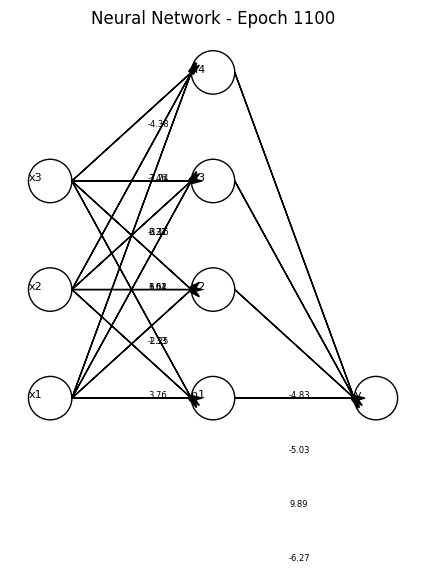

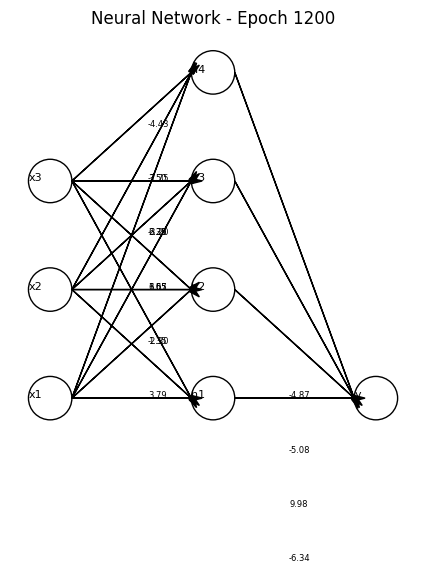

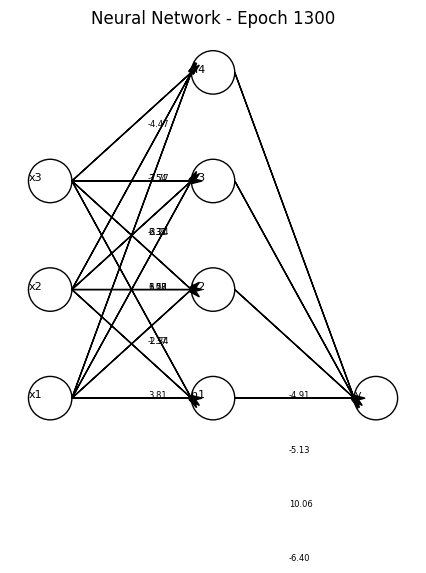

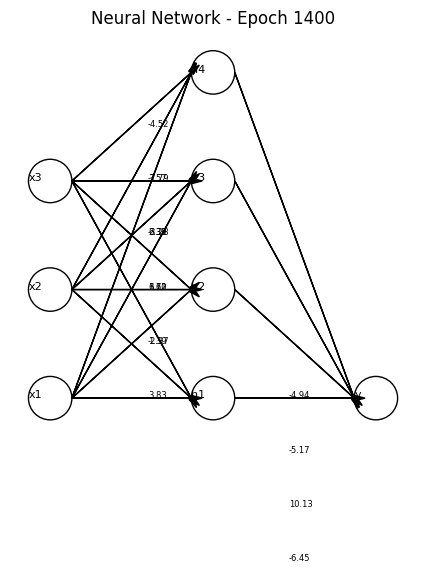

[[0.02124443]
 [0.98472345]
 [0.9758683 ]
 [0.02116339]]


In [4]:
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(X, y)
nn.train(X, y, 1500)

print(nn.output)

In [7]:
# We can see that the predicted values of y after 1500 epochs are - [0.02, 0.98, 0.97, 0.02] 
# Initially we took y as [0, 1, 1, 0]... The predicted values are very very close to the actual values
# Means my Neural Network is actually working without any deep learning libraries ⭐️⭐️